Jan Tomec, FS, Lj, 2016

In [1]:
import numpy as np
import random
#import cmath
import matplotlib.pyplot as plt

%matplotlib inline

# Random Excitation Signals Generating Methods

In here are gathered methods for generating random signals and also some other common signals.

In [2]:
# Time series
t = np.linspace(0, 10, 10000)
dt = t[1]

## 1 Pure Random

In [3]:
def pure_random(t, σ=1/np.sqrt(2)):
    """
    Uses Gaussian distribution; uses a simple random number generator.
    
    Values are distributed normally, parameters:
    t       - time series
    σ       - standard deviation of the gaussian distribution
    
    """
    
    N = t.size
    r = np.random.normal(0, scale=σ, size=N)
    
    return r

In [4]:
#%%timeit
r_pure_random = pure_random(t)

In [5]:
R_pure_random = np.fft.rfft(r_pure_random)
f_pure_random = np.fft.rfftfreq(r_pure_random.size, d=dt)

----

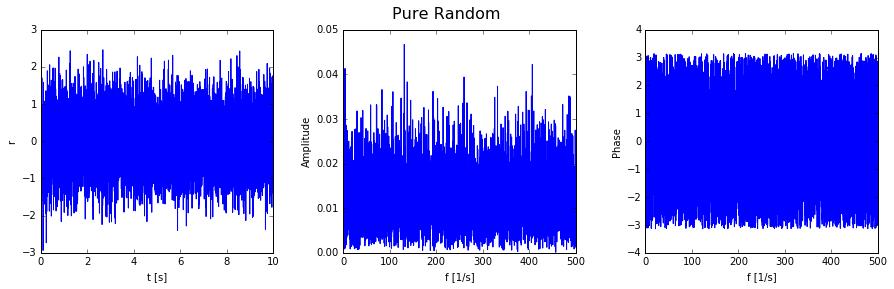

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Pure Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_pure_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_pure_random, np.abs(R_pure_random)/R_pure_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_pure_random, np.angle(R_pure_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

#plt.savefig('pure_random')

----

## 1.1 Modified Pure Random

In [7]:
r_m_pure_random = pure_random(t)

Signal have to be scaled before applying modification.

In [8]:
P_nom = 0.5 # desired power
FS = np.sqrt(P_nom/np.mean(r_m_pure_random**2)) # multiplication factor (desired power divided by actual power)
r_m_pure_random = FS*r_m_pure_random

Modification:

In [9]:
f_lim = 180
c = f_lim*2*np.pi*dt
for i in range(len(r_m_pure_random) -1):
    if abs(r_m_pure_random[i+1] - r_m_pure_random[i]) > c:
        r_m_pure_random[i+1] = r_m_pure_random[i]

In [10]:
R_m_pure_random = np.fft.rfft(r_m_pure_random)
f_m_pure_random = np.fft.rfftfreq(r_m_pure_random.size, d=dt)

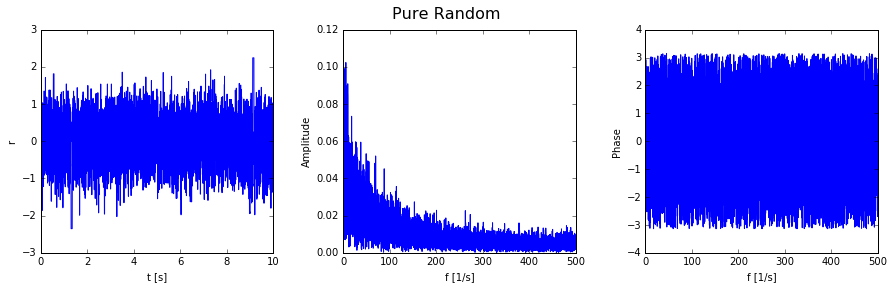

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Pure Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_m_pure_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_m_pure_random, np.abs(R_m_pure_random)/R_m_pure_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_m_pure_random, np.angle(R_m_pure_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

#plt.savefig('pure_random_mod')

Effectivity of a signal:

In [12]:
lim = int(len(f_m_pure_random)/max(f_m_pure_random)*f_lim)

In [13]:
Ramp = np.abs(R_m_pure_random)/R_m_pure_random.size

In [14]:
A = np.trapz(Ramp[:lim], dx=dt)

In [15]:
B = np.trapz(Ramp, dx=dt)

In [16]:
η = A/B
η

0.629768968082001

---

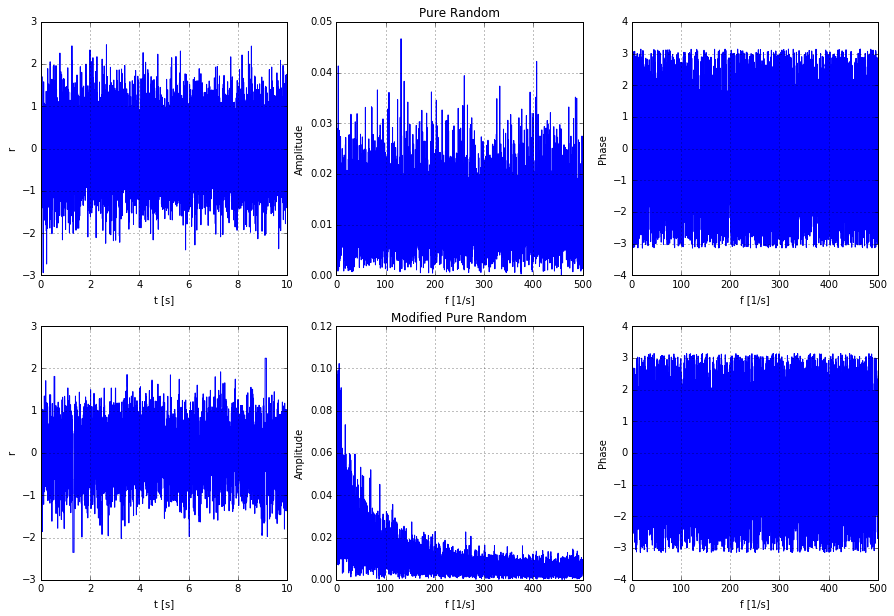

In [17]:
# plot with various axes scales
plt.figure(1, figsize=(15,10))


plt.subplot(231)
plt.plot(t, r_pure_random)
plt.xlabel('t [s]')
plt.ylabel('r')
plt.grid(True)



plt.subplot(232)
plt.plot(f_pure_random, np.abs(R_pure_random)/R_pure_random.size)
plt.xlabel('f [1/s]')
plt.ylabel('Amplitude')
plt.title('Pure Random')
plt.grid(True)



plt.subplot(233)
plt.plot(f_pure_random, np.angle(R_pure_random))
plt.xlabel('f [1/s]')
plt.ylabel('Phase')
plt.grid(True)


plt.subplot(234)
plt.plot(t, r_m_pure_random)
plt.xlabel('t [s]')
plt.ylabel('r')
plt.grid(True)


plt.subplot(235)
plt.plot(f_m_pure_random, np.abs(R_m_pure_random)/R_m_pure_random.size)
plt.xlabel('f [1/s]')
plt.ylabel('Amplitude')
plt.title('Modified Pure Random')
plt.grid(True)

plt.subplot(236)
plt.plot(f_m_pure_random, np.angle(R_m_pure_random))
plt.xlabel('f [1/s]')
plt.ylabel('Phase')
plt.grid(True)

#plt.savefig("pure_random")

plt.show()


## 2 Pseudo Random

In [18]:
def pseudo_random(t, repeats, A):
    """
    Constant amplitude 1 and random phase (uniform distribution)
    
    Parameters:
    t       - time series
    repeats - number of repeats of a time block
    A       - desired amplitudes
    """
    k = A*(t.size//(2*repeats))
    R = k*np.exp(1j*np.random.uniform(0,2*np.pi,t.size//(2*repeats) + 1))
    
    r0 = np.fft.irfft(R) # one block
    r = np.tile(r0, repeats) # N blocks
    
    if r.size == t.size:
        return r, R
    else:
        return np.append(r, np.zeros(t.size - r.size)), R

In [19]:
#%%timeit
repeats = 2
amp = np.ones(t.size//(2*repeats) + 1) # amplitudes
amp[int(len(amp)/2):] = 0

In [20]:
r_pseudo_random, R_pseudo_random = pseudo_random(t, repeats, amp)

In [21]:
f_pseudo_random = np.fft.rfftfreq(r_pseudo_random.size//repeats, d=dt)

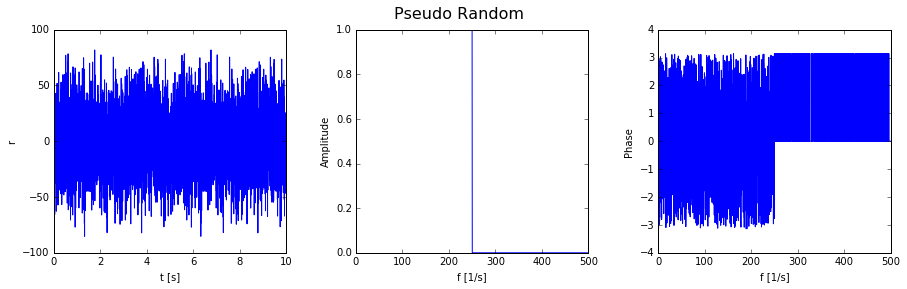

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Pseudo Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_pseudo_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_pseudo_random, np.abs(R_pseudo_random)/R_pseudo_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_pseudo_random, np.angle(R_pseudo_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

---

## 3 Periodic Random

In [23]:
def periodic_random(t,repeat_sequence):
    """
    Constant amplitude 1 and random phase (uniform distribution)
    
    Parameters:
    t               - time series
    repeat_sequence - repeat sequence of different time blocks i.e. (AABBCC), where A, B and C are different time
                      blocks with the same time length; example [1, 3, 2] denotes (ABBBCC)
    """
    
    r = np.array([])
    
    for i in repeat_sequence:
        z = np.random.uniform(0,2*np.pi,t.size//(2*np.sum(repeat_sequence)) + 1) # sized up to one time block
        R = np.array([np.cos(z) + 1j*np.sin(z)])[0]

        r0 = np.fft.irfft(R)
        r1 = np.tile(r0, i)
        r = np.append(r, r1)
        
    if r.size == t.size:
        return r
    else:
        return np.append(r, np.zeros(t.size - r.size))

In [24]:
#f%%timeit
rep_seq = [1,2]
r_periodic_random = periodic_random(t, rep_seq)

In [25]:
R_periodic_random = np.fft.rfft(r_periodic_random[:(r_periodic_random.size//np.sum(rep_seq))])[:-1]
f_periodic_random = np.fft.rfftfreq(2*R_periodic_random.size - 1, d=dt)

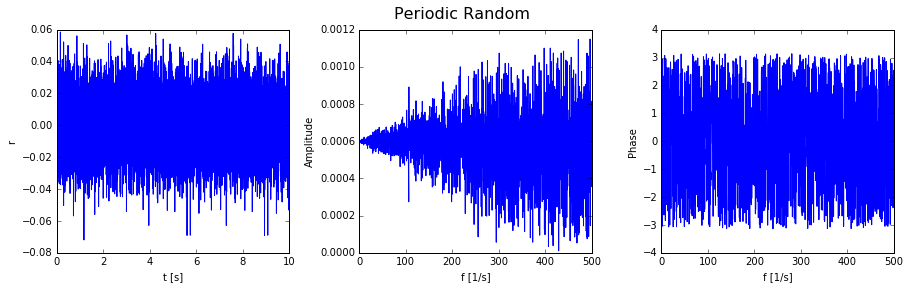

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Periodic Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_periodic_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_periodic_random, np.abs(R_periodic_random)/R_periodic_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_periodic_random, np.angle(R_periodic_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

----

## 4 Periodic Chirp

In [27]:
def periodic_chirp_linear (t, f_0, f_1, repeats):
    """
    Periodic chirp with linear frequency growth rate; 
    
    Eq: r(t) = sin[2π(f_0*t + k/2*t^2)]
    
    Paramteres:
    t         - time series
    f_0       - starting frequency
    f_1       - final frequency
    repeats   - number of signal blocks
    """
    
    k = (f_1 - f_0)/t[t.size//repeats]
    r0 = np.sin(2*np.pi*(f_0*t[:t.size//repeats] + k/2*t[:t.size//repeats]**2))
    
    r = np.tile(r0, repeats)
    
    if r.size == t.size:
        return r
    else:
        return np.append(r, np.zeros(t.size - r.size))

In [28]:
#%%timeit
rep = 2
r_periodic_chirp_linear = periodic_chirp_linear(t, 0, 15, rep)

In [29]:
R_periodic_chirp_linear = np.fft.rfft(r_periodic_chirp_linear[:(r_periodic_chirp_linear.size//rep)])[:-1]
f_periodic_chirp_linear = np.fft.rfftfreq(2*R_periodic_chirp_linear.size - 1, d=dt)

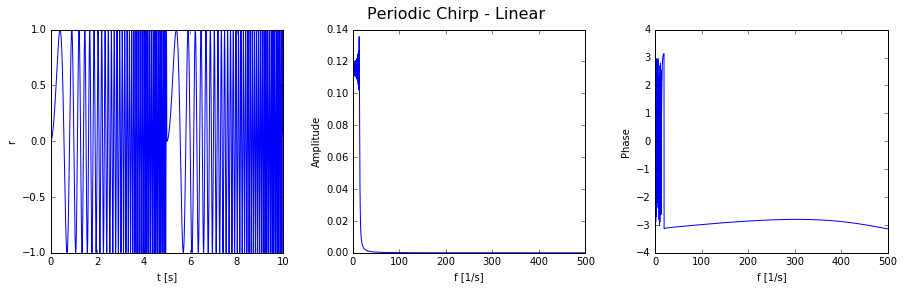

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Periodic Chirp - Linear", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_periodic_chirp_linear)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_periodic_chirp_linear, np.abs(R_periodic_chirp_linear)/R_periodic_chirp_linear.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_periodic_chirp_linear, np.angle(R_periodic_chirp_linear))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

----


In [31]:
def periodic_chirp_exponential (t, f_0, f_1, repeats):
    """
    Periodic chirp with exponential frequency growth rate; 
    
    Eq: r(t) = r(t) = sin[2π*f_0*(k**t - 1)/(ln(k))]
    
    Paramteres:
    t         - time series
    f_0       - starting frequency
    f_1       - final frequency
    repeats   - number of signal blocks
    """
    
    k = (f_1/f_0)**(1/(t[t.size//repeats]))
    r0 = np.sin(2*np.pi*f_0*(k**t[:t.size//repeats] - 1)/np.log(k))
    
    r = np.tile(r0, repeats)
    
    if r.size == t.size:
        return r
    else:
        return np.append(r, np.zeros(t.size - r.size))

In [32]:
#%%timeit
r_periodic_chirp_exponential = periodic_chirp_exponential(t, 0.1, 15, rep)

In [33]:
R_periodic_chirp_exponential = np.fft.rfft(r_periodic_chirp_exponential[:(r_periodic_chirp_exponential.size//rep)])[:-1]
f_periodic_chirp_exponential = np.fft.rfftfreq(2*R_periodic_chirp_exponential.size - 1, d=dt)

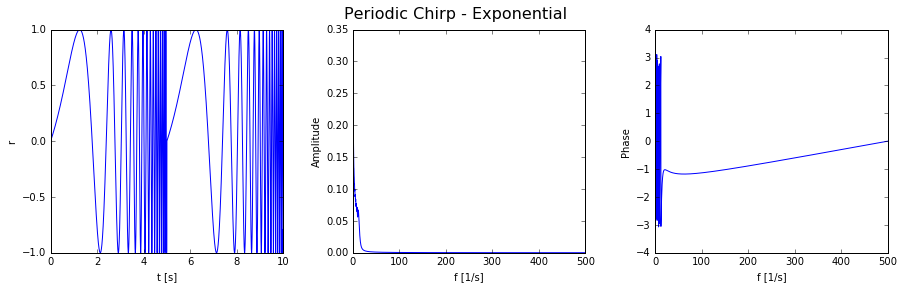

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Periodic Chirp - Exponential", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_periodic_chirp_exponential)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_periodic_chirp_exponential, np.abs(R_periodic_chirp_exponential)/R_periodic_chirp_exponential.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_periodic_chirp_exponential, np.angle(R_periodic_chirp_exponential))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

----

## 5 Burst Random

In [35]:
def burst_random(t, k, repeats, σ=1/np.sqrt(2)):
    """
    Transient signal with pure random excitation signal.
    Uses Gaussian distribution; uses a simple random number generator.
    
    Values are distributed normally, parameters:
    σ       - standard deviation of the gaussian distribution
    t       - time series
    k       - time without excitation divided by time with excitation; k = t_inactive/t_active
    """
    
    N = int((t.size*(1+k)**(-1))//repeats)
    r0 = np.random.normal(0, scale=σ, size=N)
    
    r1 = np.append(r0, t.size//repeats - N)
    
    r = np.tile(r1, repeats)
    
    if r.size == t.size:
        return r
    else:
        return np.append(r, np.zeros(t.size - r.size))

In [36]:
#%%timeit
r_burst_random = burst_random(t,0.5,rep)

In [37]:
R_burst_random = np.fft.rfft(r_burst_random[:(r_burst_random.size//rep)])[:-1]
f_burst_random = np.fft.rfftfreq(2*R_burst_random.size - 1, d=dt)

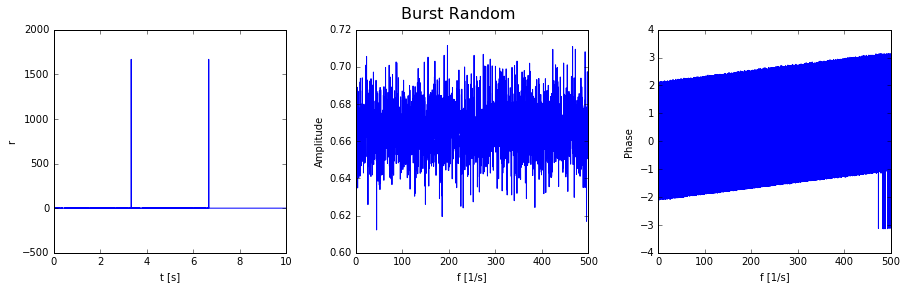

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Burst Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_burst_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_burst_random, np.abs(R_burst_random)/R_burst_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_burst_random, np.angle(R_burst_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

---

## 6 Burst Chirp

In [39]:
def burst_chirp (t, f_0, f_1, k, repeats, mode):
    #def burst_chirp_linear (t_1, N, t_2, f_0, f_1, repeats):
    """
    Periodic chirp with linear frequency growth rate; 
    
    Eq: r(t) = sin[2π(f_0*t + k/2*t^2)] # lin.
        r(t) = sin[2π*f_0*(k**t - 1)/(ln(k))] # exp.
    
    Paramteres:
    t         - time series
    f_0       - starting frequency
    f_1       - final frequency
    k         - time without excitation divided by time with excitation; k = t_inactive/t_active
    repeats   - number of signal blocks
    mode      - "l" = linear, "e" = exponential
    """
    
    #chirp
    tb = int((t.size*(1+k)**(-1))//repeats) #time point boundary at the end of the first active period
    t_a = t[:tb]
    
    if mode == "l":
        l = (f_1 - f_0)/tb
        f = f_0 + l*t
        r_a = np.sin(2*np.pi*(f_0*t_a + l/2*t_a**2))

    elif mode == "e":
        l = (f_1/f_0)**(1/(tb))
        r_a = np.sin(2*np.pi*f_0*(k**t[:tb] - 1)/np.log(k))
    else:
        print("Unvalid mode.")
        raise
    
    #pause
    t_i = t[tb:t.size//repeats]
    r_i = np.zeros(t_i.size)
    
    #repeats
    r = np.hstack([r_a,r_i])
    r = np.tile(r, repeats)
    
    if r.size == t.size:
        return r
    else:
        r = np.hstack(r, np.zeros(t.size-r.size))
        return r

In [40]:
#%%timeit
r_burst_chrip_linear = burst_chirp(t, 0, 150, 0.5, rep, "l")

In [41]:
R_burst_chirp_linear = np.fft.rfft(r_burst_chrip_linear[:(r_burst_chrip_linear.size//rep)])[:-1]
f_burst_chrip_linear = np.fft.rfftfreq(2*R_burst_chirp_linear.size - 1, d=dt)

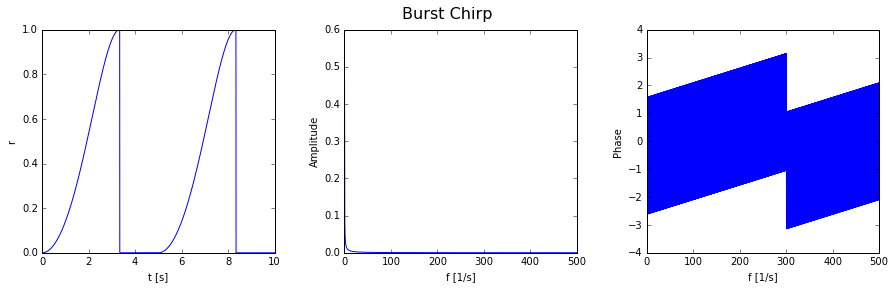

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Burst Chirp", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_burst_chrip_linear)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_burst_chrip_linear, np.abs(R_burst_chirp_linear)/R_burst_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_burst_chrip_linear, np.angle(R_burst_chirp_linear))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

----

## 7 Swept sine

In [43]:
def swept_sine(t, f_min, f_max):
    """
    parameters:
    """
    return f_min + (f_max - f_min)/(t[-1] - t[0])*t

In [44]:
#%%timeit
r_swept_sine = swept_sine(t, 1, 30)

In [45]:
R_swept_sine = np.fft.rfft(r_swept_sine)
f_swept_sine = np.fft.rfftfreq(r_swept_sine.size, d=dt)

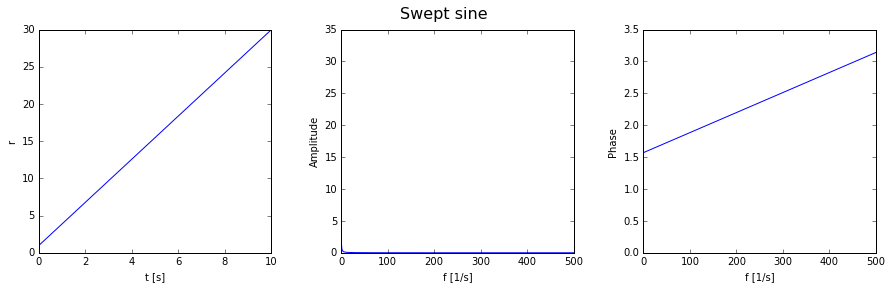

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Swept sine", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_swept_sine)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_swept_sine, np.abs(R_swept_sine)/R_swept_sine.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_swept_sine, np.angle(R_swept_sine))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

----

## 8 Stepped sine

In [47]:
def stepped_sine(t, f_min, f_max, step):
    """
    parameters:
    """
    
    num_steps = (f_max - f_min)//step
    step_len = t[-1]/num_steps
    st = np.arange(0, t[-1], step_len)
    r = np.zeros(len(t))
    for i, h in enumerate(st):
        for j, k in enumerate(t):
            if st[i] != st[-1]:
                if h <= k < st[i+1]:
                    r[j] = f_min + step*i
            elif st[i] == st[-1]:
                if h <= k < t[-1]:
                    r[j] = f_min + step*i
    
    return r

In [48]:
#%%timeit
r_stepped_sine = stepped_sine(t, 1, 30, 3)

In [49]:
R_stepped_sine = np.fft.rfft(r_stepped_sine)
f_stepped_sine = np.fft.rfftfreq(r_stepped_sine.size, d=dt)

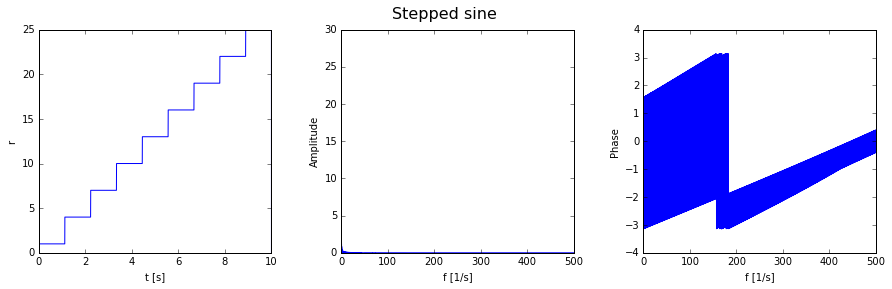

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Stepped sine", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_stepped_sine)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_stepped_sine, np.abs(R_stepped_sine)/R_stepped_sine.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_stepped_sine, np.angle(R_stepped_sine))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')